In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv')
df_session=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/session_pre.csv')



In [2]:
df_session=df_session.drop(['Unnamed: 0'],axis=1)

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df_session.rename(columns={"user_id":"id"},inplace=True)

In [5]:
df_target=df[['id','cat_duration']]

In [6]:
df_target

,id,cat_duration
0,87mebub9p4,S
1,osr2jwljor,F
2,lsw9q7uk0j,S
3,0d01nltbrs,S
4,a1vcnhxeij,S
...,...,...
86955,7plqriggxp,F
86956,msucfwmlzc,S
86957,omlc9iku7t,S
86958,0k26r3mir0,S


In [7]:
# 나중에 두가지 그룹으로 분류 하는데 그때 쓰기 위해 
merge_left = pd.merge(df_session,df_target, how='left', left_on='id', right_on='id')



In [8]:
merge_left.isnull().sum()

id                     0
action                 0
device_type            0
secs_elapsed           0
action_type            0
action_detail          0
cat_duration     7902887
dtype: int64

In [9]:
merge_left=merge_left.dropna()

In [10]:
merge_left.isnull().sum()

id               0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
cat_duration     0
dtype: int64

In [11]:
is_s=merge_left['cat_duration']=='S'
is_f=merge_left['cat_duration']=='F'

In [12]:
# 나중에 중요하다. 
subset_s = merge_left[is_s]
subset_f = merge_left[is_f]

In [13]:
# 어떠한 detail action을 사용할지 결정 
# 2.3.2. 차집합을 이용한 ‘Anti join’ 방법 
subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))


In [14]:
list_s=subset_s1.head(50).index

In [15]:
list_f=subset_f1.head(50).index

In [16]:
#중복된거 뺀다.
re_s=list_s.difference(list_f)

In [17]:
#중복된거 뺀다. 
re_f=list_f.difference(list_s)

In [18]:
#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

Index(['list_your_space', 'listing_recommendations', 'listing_reviews_page',
       'manage_listing', 'signup', 'update_listing_description', 'wishlist'],
      dtype='object')

In [19]:
# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

Index(['apply_coupon', 'at_checkpoint', 'message_to_host_focus', 'p4',
       'pending', 'post_checkout_action', 'request_new_confirm_email'],
      dtype='object')

In [20]:
# 2.3.4. 각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별
mean_s=subset_s1['action_detail'].values.mean()
mean_f=subset_f1['action_detail'].values.mean()
subset_s1['average_divide']=0


In [21]:
mean_s

9966.683333333332

In [22]:
subset_f1['average_divide']=0
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f
sub=subset_s1-subset_f1

In [23]:
sub

,action_detail,average_divide
-unknown-,-57894.0,-6.365206
account_notification_settings,-1313.0,-0.142238
account_payout_preferences,112.0,0.010061
account_privacy_settings,-40.0,-0.004533
account_transaction_history,-132.0,-0.014136
...,...,...
wishlist_content_update,22636.0,1.962591
wishlist_note,145.0,0.014189
your_listings,1567.0,0.150674
your_reservations,13.0,0.001092


In [24]:
sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


In [25]:
sub

,action_detail,average_divide
-unknown-,-57894.0,-6.365206
message_post,-9677.0,-1.039409
message_thread,-20490.0,-2.167892
p3,45597.0,3.964493
p5,-19283.0,-2.006092
update_listing,27834.0,2.765159
view_search_results,50353.0,4.490416
wishlist_content_update,22636.0,1.962591


In [26]:
detail_s=['p3','update_listing','view_search_result','wishlist_content_update']
detail_f=['-unknown-','message_post','message_thread']





In [27]:
subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)

In [28]:
subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


In [29]:
sel_s1=subset_s1.index

In [30]:
sel_f1=subset_f1.index

In [31]:
rem_s1=sel_s1.difference(sel_f1)
rem_f1=sel_f1.difference(sel_s1)

In [32]:
rem_s1

Index([], dtype='object')

In [33]:
rem_f1

Index(['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips'],
      dtype='object')

In [34]:
# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

In [35]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)

sessions_new

,id,action_count
0,udwqk3yvim,2
1,27z63cqabm,176
2,jhjdsgoz6b,28
3,a0gpn5wseo,510
4,rvtkosoo8n,54
...,...,...
28722,fznqhkp9bv,9
28723,weodxwpyjz,34
28724,sygeq29i0z,61
28725,9nndhn6z4d,74


In [36]:
# 아이디별 총 웹 이용시간 
secs_df = pd.DataFrame(merge_left.groupby('id')['secs_elapsed'].sum())


In [37]:
sessions_new = pd.merge(sessions_new,secs_df, how='inner',on='id')

In [38]:
sessions_new.isnull().sum()

id              0
action_count    0
secs_elapsed    0
dtype: int64

In [39]:
df_session_detail=df_session[['id','action_detail']]

catvar=['action_detail']
for c in catvar:
    temp=pd.get_dummies(df_session_detail[c],prefix=c, drop_first=True)
    df_session_detail=pd.concat((df_session_detail,temp),axis=1)
    
df_session_detail=df_session_detail.drop(catvar,axis=1)

df_d=pd.pivot_table(df_session_detail, index = ['id'], aggfunc = 'sum')


In [40]:
sessions_new.rename(columns={"secs_elapsed":"total_secs"},inplace=True)

In [41]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, feature)


In [42]:
sessions_new

,id,action_count,total_secs,action,action_type,action_detail,device_type
0,udwqk3yvim,2,48,active,-unknown-,-unknown-,-unknown-
1,27z63cqabm,176,4102,show,view,-unknown-,Mac Desktop
2,jhjdsgoz6b,28,667,index,view,view_search_results,Windows Desktop
3,a0gpn5wseo,510,11950,show,view,p3,Mac Desktop
4,rvtkosoo8n,54,1213,personalize,view,-unknown-,Mac Desktop
...,...,...,...,...,...,...,...
28722,fznqhkp9bv,9,192,create,submit,create_phone_numbers,Windows Desktop
28723,weodxwpyjz,34,680,show,view,p3,Windows Desktop
28724,sygeq29i0z,61,1390,show,click,p3,Mac Desktop
28725,9nndhn6z4d,74,1538,show,view,p3,Mac Desktop


In [43]:
union = list(set().union(final_S_detail,final_F_detail))


In [44]:
li_1=[]
for i in union:
    li_1.append('action_detail_'+i)

In [45]:
li_1.append('action_detail_view_search_results')

In [46]:
li_1.remove('action_detail_view_search_result')

In [47]:
df_d=df_d[li_1]

In [48]:
session_final= pd.merge(sessions_new,df_d, how='left', left_on='id', right_on=df_d.index)

In [49]:
session_final.isnull().sum()


id                                       0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_wishlist_content_update    0
action_detail_message_thread             0
action_detail_cancellation_policies      0
action_detail_pending                    0
action_detail_p1                         0
action_detail_user_listings              0
action_detail_message_post               0
action_detail_profile_verifications      0
action_detail_p3                         0
action_detail_update_user_profile        0
action_detail_p5                         0
action_detail_your_trips                 0
action_detail_update_listing             0
action_detail_create_phone_numbers       0
action_detail_view_search_results        0
dtype: int64

In [50]:
# 타켓 밸류와 연관있는 칼럼 제거
df=df.drop(['timestamp_first_active','tfa_date','duration','date_account_created'] ,axis=1)


In [51]:
#target value means that tiem between booking and time first activity 
# so variables about signup are not considered 

df=df.drop(['signup_flow','signup_app','signup_method','date_first_booking'],axis=1)

In [52]:
# 디바이스 타입은 이미 따로 해놨으니 필요없음 
df=df.drop(['first_device_type'],axis=1)

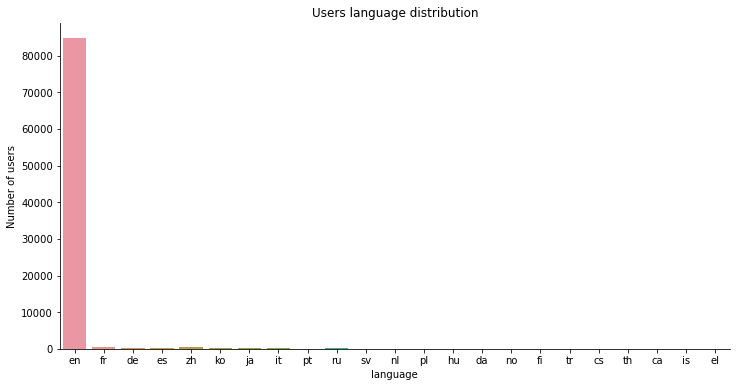

In [53]:
# country 변수 추가 
df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/countries.csv")



merge_c = pd.merge(df,df_country, how='left', left_on='country_destination', right_on='country_destination')




merge_c=merge_c.drop(['lat_destination','lng_destination'],axis=1)

#결측치 제거 !! maybe other 지역 
merge_c=merge_c.dropna(axis=0)

merge_c=merge_c.drop(['language_levenshtein_distance'],axis=1)


import seaborn as sns

df_without_NDF = df[df['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

# 즉 다른 나라의 언어는 영어면 장땡이다. 즉 다른 나라의 언어 변수가 크게 영향을 안끼칠거라는 생각이든다
# 언어 관련 변수의 영향력은 그렇게 크지 않을꺼 같다.

merge_c=merge_c.drop(['destination_language ','language'],axis=1)

In [54]:
merge_c

,id,gender,age,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_browser,country_destination,cat_duration,distance_km,destination_km2
0,87mebub9p4,MALE,41.000000,direct,direct,untracked,Chrome,US,S,0.000,9826675.0
1,osr2jwljor,FEMALE,36.048687,other,other,omg,Chrome,US,F,0.000,9826675.0
2,lsw9q7uk0j,FEMALE,46.000000,other,craigslist,untracked,Safari,US,S,0.000,9826675.0
3,0d01nltbrs,FEMALE,47.000000,direct,direct,omg,Safari,US,S,0.000,9826675.0
4,a1vcnhxeij,FEMALE,50.000000,other,craigslist,untracked,Safari,US,S,0.000,9826675.0
...,...,...,...,...,...,...,...,...,...,...,...
86955,7plqriggxp,FEMALE,55.000000,sem-brand,google,omg,IE,FR,F,7682.945,643801.0
86956,msucfwmlzc,MALE,43.000000,direct,direct,untracked,Firefox,US,S,0.000,9826675.0
86957,omlc9iku7t,FEMALE,34.000000,direct,direct,linked,Chrome,ES,S,7730.724,505370.0
86958,0k26r3mir0,FEMALE,36.000000,sem-brand,google,linked,Safari,US,S,0.000,9826675.0


In [55]:
id_m=merge_c['id']



In [56]:
merge_c.head()

,id,gender,age,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_browser,country_destination,cat_duration,distance_km,destination_km2
0,87mebub9p4,MALE,41.000000,direct,direct,untracked,Chrome,US,S,0.0,9826675.0
1,osr2jwljor,FEMALE,36.048687,other,other,omg,Chrome,US,F,0.0,9826675.0
2,lsw9q7uk0j,FEMALE,46.000000,other,craigslist,untracked,Safari,US,S,0.0,9826675.0
3,0d01nltbrs,FEMALE,47.000000,direct,direct,omg,Safari,US,S,0.0,9826675.0
4,a1vcnhxeij,FEMALE,50.000000,other,craigslist,untracked,Safari,US,S,0.0,9826675.0


In [57]:
merge_c=merge_c.drop(['country_destination','affiliate_provider','first_affiliate_tracked'],axis=1)

In [60]:
# 더미 데이터 
catvar=['gender', 'affiliate_channel','first_browser','cat_duration']
for c in catvar:
    temp=pd.get_dummies(merge_c[c],prefix=c, drop_first=True)
    merge_c=pd.concat((merge_c,temp),axis=1)

merge_c=merge_c.drop(catvar,axis=1)


In [61]:
merge_c

,id,age,distance_km,destination_km2,gender_MALE,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_wOSBrowser,cat_duration_S
0,87mebub9p4,41.000000,0.000,9826675.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,osr2jwljor,36.048687,0.000,9826675.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lsw9q7uk0j,46.000000,0.000,9826675.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0d01nltbrs,47.000000,0.000,9826675.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,a1vcnhxeij,50.000000,0.000,9826675.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86955,7plqriggxp,55.000000,7682.945,643801.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86956,msucfwmlzc,43.000000,0.000,9826675.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
86957,omlc9iku7t,34.000000,7730.724,505370.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
86958,0k26r3mir0,36.000000,0.000,9826675.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [62]:
target=merge_c[['cat_duration_S']]

In [63]:
merge_c.dtypes

id                                 object
age                               float64
distance_km                       float64
destination_km2                   float64
gender_MALE                         uint8
                                   ...   
first_browser_Stainless             uint8
first_browser_TenFourFox            uint8
first_browser_TheWorld Browser      uint8
first_browser_wOSBrowser            uint8
cat_duration_S                      uint8
Length: 97, dtype: object

In [64]:
merge_c=merge_c.drop(['id'],axis=1)

In [65]:
target

,cat_duration_S
0,1
1,0
2,1
3,1
4,1
...,...
86955,0
86956,1
86957,1
86958,1


In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


full_model = sm.OLS(target.values,merge_c.values)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.015e+24
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:53:15   Log-Likelihood:                      2.0568e+06
No. Observations:               77003   AIC:                                 -4.114e+06
Df Residuals:                   76957   BIC:                                 -4.113e+06
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.029e-14    2.2e-16    -46.735      0.000   -1.07e-14   -9.86e-15
x2          6.378e-17   1.37e-18     46.658      0.000    6.11e-17    6.65e-17
x3          5.103e-20   1.14e-21     44.783      0.000    4.88e-20    5.33e-20
x4         -2.526e-15   1.46e-15     -1.726      0.084    -5.4e-15    3.43e-16
x5         -1.332e-14   1.05e-14     -1.269      0.204   -3.39e-14    7.25e-15
x6         -1.298e-14   3.87e-15     -3.359      0.001   -2.06e-14   -5.41e-15
x7         -1.788e-14   5.29e-15     -3.377      0.001   -2.83e-14    -7.5e-15
x8         -2.562e-14   1.21e-14     -2.126      0.034   -4.92e-14      -2e-15
x9         -1.382e-14   4.39e-15     -3.149      0.002   -2.24e-14   -5.22e-15
x10        -1.269e-14   4.73e-15     -2.683      0.007    -2.2e-14   -3.42e-15
x11        -1.189e-14    5.2e-15     -2.284      0.022   -2.21e-14   -1.69e-15
x12        -2.227e-15   1.46e-15     -1.521      0.128    -5.1e-15    6.42e-16
x13        -1.339e-14   1.05e-14     -1.276      0.202    -3.4e-14    7.18e-15
x14        -1.259e-14   3.87e-15     -3.256      0.001   -2.02e-14   -5.01e-15
x15        -1.772e-14   5.29e-15     -3.347      0.001   -2.81e-14   -7.34e-15
x16        -2.542e-14   1.21e-14     -2.110      0.035    -4.9e-14    -1.8e-15
x17        -1.334e-14   4.39e-15     -3.038      0.002   -2.19e-14   -4.73e-15
x18        -1.282e-14   4.73e-15     -2.711      0.007   -2.21e-14   -3.55e-15
x19        -1.163e-14    5.2e-15     -2.235      0.025   -2.18e-14   -1.43e-15
x20        -4.325e-13   4.02e-14    -10.766      0.000   -5.11e-13   -3.54e-13
x21         3.077e-14      2e-14      1.539      0.124   -8.43e-15       7e-14
x22         4.559e-12   8.13e-14     56.073      0.000     4.4e-12    4.72e-12
x23         -5.15e-13    6.8e-14     -7.570      0.000   -6.48e-13   -3.82e-13
x24        -2.937e-12   1.15e-13    -25.563      0.000   -3.16e-12   -2.71e-12
x25         2.479e-14   4.71e-15      5.264      0.000    1.56e-14     3.4e-14
x26           3.1e-14   1.66e-14      1.873      0.061   -1.44e-15    6.34e-14
x27         3.796e-13   4.95e-14      7.674      0.000    2.83e-13    4.77e-13
x28        -2.313e-12   3.04e-13     -7.616      0.000   -2.91e-12   -1.72e-12
x29         6.633e-12   1.75e-13     37.816      0.000    6.29e-12    6.98e-12
x30         2.442e-14   5.06e-15      4.831      0.000    1.45e-14    3.43e-14
x31         2.401e-14   5.74e-15      4.180      0.000    1.28e-14    3.53e-14
x32        -7.869e-13   1.15e-13     -6.850      0.000   -1.01e-12   -5.62e-13
x33        -2.499e-13   1.15e-13     -2.176      0.030   -4.75e-13   -2.48e-14
x34        -2.002e-12   1.15e-13    -17.430      0.000   -2.23e-12   -1.78e-12
x35          8.16e-13   8.43e-14      9.677      0.000    6.5

In [67]:
merge_c.columns

Index(['age', 'distance_km', 'destination_km2', 'gender_MALE',
       'affiliate_channel_content', 'affiliate_channel_direct',
       'affiliate_channel_other', 'affiliate_channel_remarketing',
       'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand',
       'affiliate_channel_seo', 'gender_MALE', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'first_browser_AOL Explorer', 'first_browser_Android Browser',
       'first_browser_Apple Mail', 'first_browser_BlackBerry Browser',
       'first_browser_Camino', 'first_browser_Chrome',
       'first_browser_Chrome Mobile', 'first_browser_Chromium',
       'first_browser_CometBird', 'first_browser_CoolNovo',
       'first_browser_Firefox', 'first_browser_IE', 'first_browser_IE Mobile',
       'first_browser_IceWeasel', 'first_browser_Iron',
  

In [68]:
rm=merge_c[['age','distance_km','destination_km2']]

In [69]:
merge_c1 = merge_c.astype(int)





In [70]:
merge_c1.dtypes

age                               int64
distance_km                       int64
destination_km2                   int64
gender_MALE                       int64
affiliate_channel_content         int64
                                  ...  
first_browser_Stainless           int64
first_browser_TenFourFox          int64
first_browser_TheWorld Browser    int64
first_browser_wOSBrowser          int64
cat_duration_S                    int64
Length: 96, dtype: object

In [71]:
target

,cat_duration_S
0,1
1,0
2,1
3,1
4,1
...,...
86955,0
86956,1
86957,1
86958,1


In [72]:
features=list(merge_c1.columns)

In [73]:
features

['age',
 'distance_km',
 'destination_km2',
 'gender_MALE',
 'affiliate_channel_content',
 'affiliate_channel_direct',
 'affiliate_channel_other',
 'affiliate_channel_remarketing',
 'affiliate_channel_sem-brand',
 'affiliate_channel_sem-non-brand',
 'affiliate_channel_seo',
 'gender_MALE',
 'affiliate_channel_content',
 'affiliate_channel_direct',
 'affiliate_channel_other',
 'affiliate_channel_remarketing',
 'affiliate_channel_sem-brand',
 'affiliate_channel_sem-non-brand',
 'affiliate_channel_seo',
 'first_browser_AOL Explorer',
 'first_browser_Android Browser',
 'first_browser_Apple Mail',
 'first_browser_BlackBerry Browser',
 'first_browser_Camino',
 'first_browser_Chrome',
 'first_browser_Chrome Mobile',
 'first_browser_Chromium',
 'first_browser_CometBird',
 'first_browser_CoolNovo',
 'first_browser_Firefox',
 'first_browser_IE',
 'first_browser_IE Mobile',
 'first_browser_IceWeasel',
 'first_browser_Iron',
 'first_browser_Maxthon',
 'first_browser_Mobile Firefox',
 'first_browse

In [77]:
merge_c['const']=0

In [84]:

#변수 선택법

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

 

import time
import itertools



def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
def forward(X,y,predictors):

    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(x=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
    
    
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
    	results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model

### 전진선택법 모델

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

stepwiseBestModel = Stepwise_model(merge_c,taget)


SyntaxError: invalid syntax (<ipython-input-84-c549eca65e92>, line 81)

In [79]:
Forward_best_model.summary()


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         cat_duration_S   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.909e+32
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:55:49   Log-Likelihood:                      2.6057e+06
No. Observations:               77003   AIC:                                 -5.211e+06
Df Residuals:                   77000   BIC:                                 -5.211e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cat_duration_S                1.0000    2.6e-18   3.84e+17      0.000       1.000       1.000
distance_km               -1.139e-19   5.22e-22   -218.153      0.000   -1.15e-19   -1.13e-19
first_browser_SlimBrowser -3.444e-14   2.44e-16   -141.357      0.000   -3.49e-14    -3.4e-14
first_browser_SlimBrowser -3.814e-14   2.44e-16   -156.507      0.000   -3.86e-14   -3.77e-14
const                              0          0        nan        nan           0           0
==============================================================================
Omnibus:                   250882.748   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     235339266957.124
Skew:                          54.403   Prob(JB):                         0.00
Kurtosis:                    8566.749   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""